In [2]:
%matplotlib inline 
import numpy as np                       
from matplotlib import pyplot as plt      
import time, sys                   

### Постановка и сеточные параметры

Рассмотрим задачу об эволюции ступеньки. Численное решается уравнение переноса с коэффициентом переноса $c$.

In [3]:
nx = 41  # количество узлов по пространству пробуем 121
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта
print('r = ', r)
print('T = ', T)

r =  0.5
T =  0.6000000000000001


#### Начальные условия

Зададим $u(x, 0) = 2$ при $x \in [0.5, 1]$ и $u(x, 0) = 1$ иначе во всей расчетной области. Такая функция называется "ступенька". 

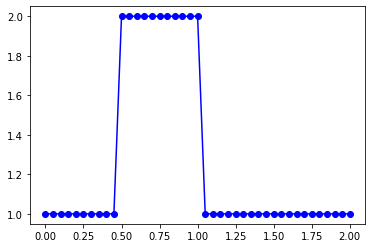

In [4]:
u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2  
plt.plot(x_mesh, u_init, '-bo')

#### Точное решение

К моменту времени T ступенька просто сдвинется вправо

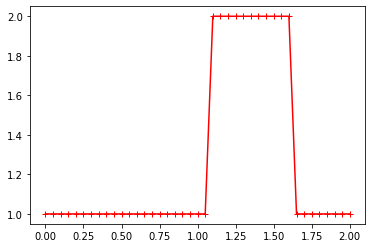

In [5]:
u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2  
plt.plot(x_mesh, u_exact, '-r+')

### Численное решение

#### Часть 1. Явный левый уголок
Сначала примените схему Явный левый уголок (Upwind scheme). Провести расчеты для $nx = 41; 81; 121$. Построить графики решения

In [6]:
un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага
u = u_init.copy()
for n in range(1, nt):  # шагаем по времени
    un = u.copy() # заполняем данными с предыдущего шага
    for i in range(1, nx): # шагаем по пространству
        u[i] = un[i] - r*(un[i] - un[i-1])

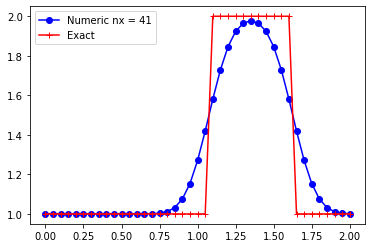

In [8]:
plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()


41
81
121


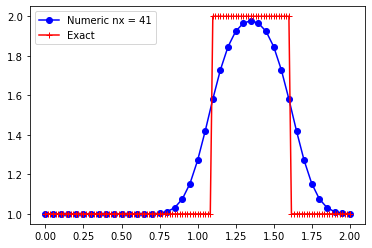

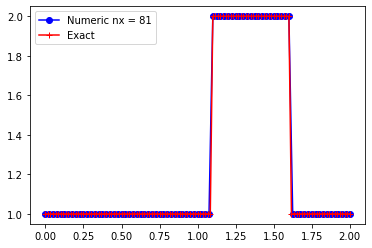

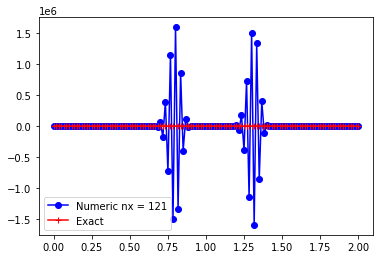

In [ ]:
def upwind(nx):
    dx = 2 / (nx-1) # шаг по пространству
    nt = 25    # количество узлов по времени
    dt = .025  # шаг по времени
    T = dt*(nt-1)
    c = 1      # скорость распространения возмущения (коэффициент переноса)
    x_mesh = np.linspace(0, 2, nx) #сетка по пространству
    r = c*dt/dx # число Куранта
    
    u_init = np.ones(nx)      
    u_init[int(.5 / dx):int(1 / dx + 1)] = 2 
    
    un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага 
    u = u_init.copy()
    for n in range(1, nt):  # шагаем по времени
        un = u.copy() # заполняем данными с предыдущего шага
        for i in range(1, nx): # шагаем по пространству
            u[i] = un[i] - r*(un[i] - un[i-1])
    print(nx)
    return [x_mesh, u]

upwind41 = upwind(41)
upwind81 = upwind(81)
upwind121 = upwind(121)
plt.plot(upwind41[0], upwind41[1], '-bo', label = 'Numeric nx = 41')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()
plt.plot(upwind81[0], upwind81[1], '-bo', label = 'Numeric nx = 81')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()

plt.plot(upwind121[0], upwind121[1], '-bo', label = 'Numeric nx = 121')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()

0. Какой у схемы порядок аппроксимации?
1. Удалось ли получить решение? Почему?
2. Сколько граничных условий и где нужно поставить в этой задаче?
3. Почему в задаче явно нигде не инициализируются граничные условия?
4. Почему в цикле по пространству индексация с 1?
5. Можно ли решить задачу схемой Явный правый уголок?
6. Почему при решении на 41 узле решение размывается, а на 81 узле нет?
7. Объясните причину размытия решения.

Для ответа на шестой вопрос может быть полезна книга [1], c.71

1. Зализняк В.Е. Основы вычислительной физики. Часть 1. Введение в конечно-разностные методы

0. Ответ: первый по $h$ и $\tau$

$u_j^{n+1} = u_j^n + \frac{a\tau}{h}(u_j^n-u_{j-1}^n)$

$u(x, t+\tau) = u(x,t) + \frac{a\tau}{h}(u(x,t) - u(x-h, t))+ r$

$r = u(x, t+\tau) - u(x,t) - \frac{a\tau}{h}(u(x,t) - u(x-h, t)) = u(x, t) + o(\tau) - u(x,t) - \frac{a\tau}{h}(u(x,t) - u(x,t) + o(h)) = o(\tau+ h)$

1. Удалось при $nx = 81$, именно для него потому что это максимально возможное число из области устойчивости, которое определяется условием Куранта–Фридрихса–Леви: $|\frac{a\triangle t}{\triangle x}| \leq 1$. То есть при $nx = 121$ резонанс, при $nx = 41$ неточное.

2. одно слева

3.  они инициализируются неявно так как слева начальное условие всегда ноль и оно в цикле не изменяется, поэтому ноль на каждом шаге копируется.

4. в схеме берется предыдущее значение по пространству, поэтому можно применять только с 1 (для нулевого нет -1 элемента)

5. $c= 1 > 0$, для которого явный правый уголок неустойчив (он устойчив при $c < 0$)

6. При $nx = 41$ решение размывается из-за дисперсии. Как описано  в [1] гармоники распространяются с разными скоростями, поэтому через время они разделяются. Для $nx = 81$ число куранта равно 1, поэтому групповая скорость решения метода совпадает с групповой скоростью точного.



#### Часть 2. Схема МакКормака 

Теперь примените схему МакКормака (MacCormack method). Провести расчеты для $nx = 41; 81; 121$. Построить графики решения

In [9]:
un = np.ones(nx) # инициализация вспомогательного массива для хранения данных с предыдущего шага
# TODO: создадим еще вспомогательных структур?
uprov = np.ones(nx) # array of provisional values

u = u_init.copy()
for n in range(1, nt): 
    un = u.copy() 
    # TODO: predictor
    for i in range(1, nx-1): # шагаем по пространству
        uprov[i] = un[i] - r*(un[i+1] - un[i])
    # TODO: corrector
    for i in range(1, nx):
        u[i] = (u[i]+uprov[i])/2 - r/2*(uprov[i] - uprov[i-1])
        

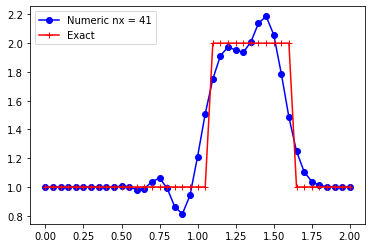

In [10]:
plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()

In [ ]:
def maccormack(nx):
    dx = 2 / (nx-1) # шаг по пространству
    nt = 25    # количество узлов по времени
    dt = .025  # шаг по времени
    T = dt*(nt-1)
    c = 1      # скорость распространения возмущения (коэффициент переноса)
    x_mesh = np.linspace(0, 2, nx) #сетка по пространству
    r = c*dt/dx # число Куранта
    
    u_init = np.ones(nx)      
    u_init[int(.5 / dx):int(1 / dx + 1)] = 2 
    
    un = np.ones(nx) # инициализация вспомогательного массива для хранения данных с предыдущего шага
    # TODO: создадим еще вспомогательных структур?
    uprov = np.ones(nx) # array of provisional values

    u = u_init.copy()
    for n in range(1, nt): 
        un = u.copy() 
        # TODO: predictor
        for i in range(1, nx-1): # шагаем по пространству
            uprov[i] = un[i] - r*(un[i+1] - un[i])
        # TODO: corrector
        for i in range(1, nx):
            u[i] = (u[i]+uprov[i])/2 - r/2*(uprov[i] - uprov[i-1])
    return [x_mesh, u]

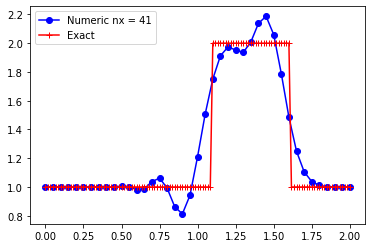

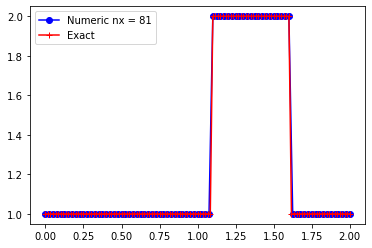

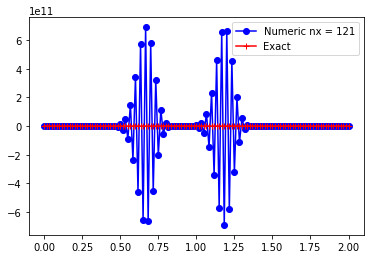

In [ ]:
maccormack41 = maccormack(41)
maccormack81 = maccormack(81)
maccormack121 = maccormack(121)
plt.plot(maccormack41[0], maccormack41[1], '-bo', label = 'Numeric nx = 41')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()
plt.plot(maccormack81[0], maccormack81[1], '-bo', label = 'Numeric nx = 81')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()

plt.plot(maccormack121[0], maccormack121[1], '-bo', label = 'Numeric nx = 121')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()

0. Какой у схемы порядок аппроксимации?

1. Удалось ли получить решение? Почему?

2. Почему при решении на 41 узле решение осциллирует, а на 81 узле нет?

3. Объясните причину осцилляций.

4. Совпадает ли схема со схемой Лакса-Вендроффа для данной задачи (Lax–Wendroff method)?

0. Второй порядок аппроксимации
https://ftf.tsu.ru/wp-content/uploads/L.L.-Minkov-E.R.-SHrager-Osnovnye-podhody-k-chislennomu-resheniyu-odnomernyh-uravnenij-teploprovodnosti.pdf
стр.33 

1. Удалось при $nx = 81$, потому что схема устойчива и число куранта 1

2,3. При $nx = 41$ решение осциллирует из-за дисперсии. Как описано  в [1] гармоники распространяются с разными скоростями, поэтому через время они разделяются. Для $nx = 81$ число куранта равно 1, поэтому групповая скорость решения метода совпадает с групповой скоростью точного.

4. Да, совпадает: https://ftf.tsu.ru/wp-content/uploads/L.L.-Minkov-E.R.-SHrager-Osnovnye-podhody-k-chislennomu-resheniyu-odnomernyh-uravnenij-teploprovodnosti.pdf
стр.33 

#### Часть 3. Монотонная схема высокого порядка

1. Можно ли построить линейную монотонную по Годунову схему с порядком выше первого? Почему?

Нельзя, доказательство в статье https://www.ece.uvic.ca/~bctill/papers/numacoust/Godunov_1959.pdf стр.7

2. Постройте монотонную схему порядка выше первого и примените к решению задачи из предыдущих частей.

из https://mipt.ru/education/chair/computational_mathematics/upload/f9c/Laba_1_theory-arphsgar1js.pdf стр.9

схема: $u_m^{n+1} = a_{-2}u_{m-2}^n+a_{-1}u_{m-1}^n + a_{0}u_{m}^n + a_{1}u_{m+1}^n$

Условия аппроксимации 3 порядка: 

$a_{-2}+a_{-1}+a_0+a_1=1$

$2a_{-2}+a_{-1}-a_1=r$

$4a_{-2}+a_{-1}+a_1=r^2$

$8a_{-2}+a_{-1}-a_1=r^3$

Откуда получаем:

$a_{-2}=\frac{r^3-r}{6}$

$a_{-1}=\frac{2r+r^2-r^3}{2}$

$a_{0} = \frac{2-r-2r^2+r^3}{2}$

$a_1=\frac{-2r+3r^2-r^3}{6}$

41
81
121


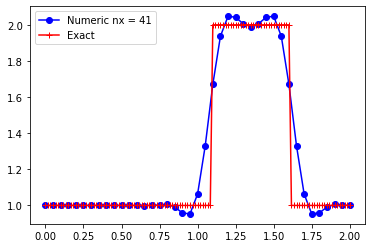

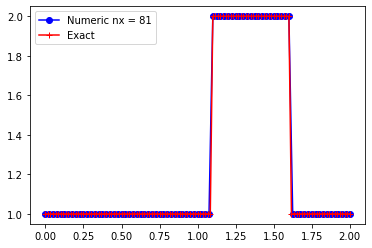

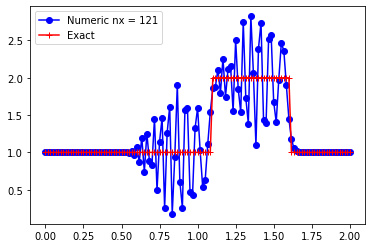

In [ ]:
def third_scheme(nx):
    dx = 2 / (nx-1) # шаг по пространству
    nt = 25    # количество узлов по времени
    dt = .025  # шаг по времени
    T = dt*(nt-1)
    c = 1      # скорость распространения возмущения (коэффициент переноса)
    x_mesh = np.linspace(0, 2, nx) #сетка по пространству
    r = c*dt/dx # число Куранта
    
    a_2 = (r**3-r) / 6
    a_1 = (2*r+r**2-r**3) / 2
    a0 = (2-r-2*r**2+r**3) / 2
    a1 = (-2*r+3*r**2-r**3) / 6
    
      u_init = np.ones(nx)      
      u_init[int(.5 / dx):int(1 / dx + 1)] = 2 
      
      un = np.ones(nx) # инициализация вспомогательного массива для хранения
                  # данных с предыдущего шага 
      u = u_init.copy()
      for n in range(1, nt):  # шагаем по времени
          un = u.copy() # заполняем данными с предыдущего шага
          for i in range(2, nx-1): # шагаем по пространству
              u[i] = a_2*un[i-2] + a_1*un[i-1] + a0*un[i] + a1*un[i+1]
      print(nx)
      return [x_mesh, u]

third_scheme41 = third_scheme(41)
third_scheme81 = third_scheme(81)
third_scheme121 = third_scheme(121)
plt.plot(third_scheme41[0], third_scheme41[1], '-bo', label = 'Numeric nx = 41')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()
plt.plot(third_scheme81[0], third_scheme81[1], '-bo', label = 'Numeric nx = 81')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()

plt.plot(third_scheme121[0], third_scheme121[1], '-bo', label = 'Numeric nx = 121')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()